In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random
from keras.preprocessing.image import ImageDataGenerator
import os

Using TensorFlow backend.


In [2]:
img = cv2.imread('./dataset/Bicycles crossing/030_0001.png')
img.shape

(125, 140, 3)

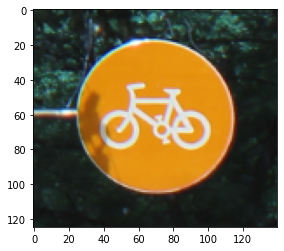

In [3]:
plt.imshow(img)

In [4]:
path_to_data = "./dataset/"# folder with all the class folders
path_to_cr_data = "./dataset/cropped/"
batch_size_val=50  # how many to process together
steps_per_epoch_val=2000
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################

In [5]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [6]:
img_dirs

['./dataset/Bicycles crossing',
 './dataset/Bicycles Crossing1',
 './dataset/Children crossing',
 './dataset/cropped',
 './dataset/Danger Ahead',
 './dataset/Dangerous curve to the left',
 './dataset/Dangerous curve to the right',
 './dataset/Dont Go Left',
 './dataset/Dont Go Left or Right',
 './dataset/Dont Go Right',
 './dataset/Dont Go straight',
 './dataset/Dont Go straight or left',
 './dataset/Dont Go straight or Right',
 './dataset/Dont overtake from Left',
 './dataset/Fences',
 './dataset/Give Way',
 './dataset/Go Left',
 './dataset/Go Left or right',
 './dataset/Go left or straight',
 './dataset/Go Right',
 './dataset/Go right or straight',
 './dataset/Go straight',
 './dataset/Go straight or right',
 './dataset/Heavy Vehicle Accidents',
 './dataset/Horn',
 './dataset/keep Left',
 './dataset/keep Right',
 './dataset/No Car',
 './dataset/No entry',
 './dataset/No horn',
 './dataset/No Uturn',
 './dataset/Road Divider',
 './dataset/Roundabout mandatory',
 './dataset/Speed limit

In [7]:
count = 0
images = []
classNo = []
traffic = []
myList = os.listdir(path_to_data)
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    noOfClasses=len(myList)
    for x in celebrity_name:
        myPicList = os.listdir(path_to_data+"/"+str(celebrity_name))
        for y in myPicList:
            curImg = cv2.imread(path_to_data+"/"+str(celebrity_name)+"/"+y)
            resizeImg = cv2.resize(curImg, (32,32))
            images.append(resizeImg)
            classNo.append(count)
            traffic.append(celebrity_name)
    print(celebrity_name, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)   

Bicycles crossing Bicycles Crossing1 Children crossing cropped Danger Ahead Dangerous curve to the left Dangerous curve to the right Dont Go Left Dont Go Left or Right Dont Go Right Dont Go straight Dont Go straight or left Dont Go straight or Right Dont overtake from Left Fences Give Way Go Left Go Left or right Go left or straight Go Right Go right or straight Go straight Go straight or right Heavy Vehicle Accidents Horn keep Left keep Right No Car No entry No horn No Uturn Road Divider Roundabout mandatory Speed limit (15kmh) Speed limit (30kmh) Speed limit (40kmh) Speed limit (50kmh) Speed limit (5kmh) Speed limit (60kmh) Speed limit (70kmh) speed limit (80kmh) Traffic signals Train Crossing Under Construction Uturn watch out for cars Zebra Crossing ZigZag Curve  


In [8]:
print(classNo)
#print(traffic)
print(len(myList))

[ 0  0  0 ... 47 47 47]
48


In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 

In [10]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"
 

Data Shapes
Train(35128, 32, 32, 3) (35128,)
Validation(8782, 32, 32, 3) (8782,)
Test(10978, 32, 32, 3) (10978,)


In [11]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img

In [12]:
X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
#cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY

In [13]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [14]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)

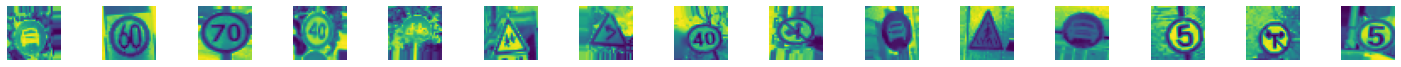

In [15]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()

In [16]:
print(y_test)
print(len(y_test))
print(y_validation)
print(len(y_validation))
print(y_train)
print(len(y_train))

[20 34 10 ... 45 36 35]
10978
[35 45 38 ... 13 46 35]
8782
[ 1 40 37 ... 39  6 45]
35128


In [17]:
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

In [18]:
print(y_test)
print(len(y_test))
print(y_validation)
print(len(y_validation))
print(y_train)
print(len(y_train))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10978
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
8782
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
35128


In [19]:
no_Of_Filters=60
size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
                     # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
size_of_Filter2=(3,3)
size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
model= Sequential()
model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
model.add(MaxPooling2D(pool_size=size_of_pool))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(no_Of_Nodes,activation='relu'))
model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
model.add(Dense(noOfClasses,activation='softmax')) # OUTPUT LAYER
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)         

In [20]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1) 

Epoch 1/10
2000/2000 [==============================] - 661s 330ms/step - loss: 2.1933 - accuracy: 0.3929 - val_loss: 0.6898 - val_accuracy: 0.7970
Epoch 2/10
2000/2000 [==============================] - 627s 314ms/step - loss: 1.0696 - accuracy: 0.6689 - val_loss: 0.3196 - val_accuracy: 0.9206
Epoch 3/10
2000/2000 [==============================] - 595s 298ms/step - loss: 0.7389 - accuracy: 0.7668 - val_loss: 0.1739 - val_accuracy: 0.9581
Epoch 4/10
2000/2000 [==============================] - 988s 494ms/step - loss: 0.5562 - accuracy: 0.8252 - val_loss: 0.0827 - val_accuracy: 0.9826
Epoch 5/10
2000/2000 [==============================] - 629s 314ms/step - loss: 0.4361 - accuracy: 0.8633 - val_loss: 0.0458 - val_accuracy: 0.9903
Epoch 6/10
2000/2000 [==============================] - 649s 325ms/step - loss: 0.3518 - accuracy: 0.8892 - val_loss: 0.0286 - val_accuracy: 0.9936
Epoch 7/10
2000/2000 [==============================] - 716s 358ms/step - loss: 0.2935 - accuracy: 0.9091 - val_

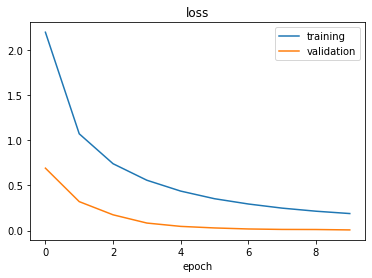

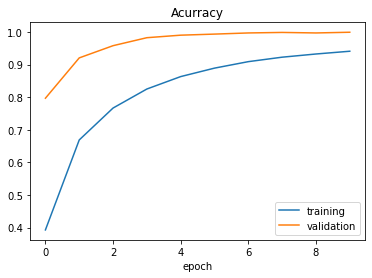

Test Score: 0.007927447237423854
Test Accuracy: 0.9989069104194641


In [22]:
############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [23]:
import joblib
joblib.dump(model, 'saved_model.pkl')
#you guyz can change the epoch to get better results

['saved_model.pkl']

ERROR! Session/line number was not unique in database. History logging moved to new session 388
